In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as SklearnLDA

# Datos originales
df = pd.read_csv('lda.csv')

# Codificar etiquetas
le = LabelEncoder()
y = le.fit_transform(df["Genero"])  # 0 = Hombre, 1 = Mujer
X = df[["Peso", "Estatura"]].values


In [13]:
df

,Peso,Estatura,Genero
0,52.5,158,Mujer
1,48.2,162,Mujer
2,55.8,155,Mujer
3,61.3,168,Mujer
4,49.7,160,Mujer
5,58.4,165,Mujer
6,53.9,157,Mujer
7,46.8,153,Mujer
8,59.2,170,Mujer
9,51.6,159,Mujer


In [14]:
# LDA con sklearn
lda = SklearnLDA(n_components=1)
X_lda_sklearn = lda.fit_transform(X, y)

# Añadir columna al DataFrame
df["LDA_sklearn"] = X_lda_sklearn


In [15]:
df

,Peso,Estatura,Genero,LDA_sklearn
0,52.5,158,Mujer,2.078514
1,48.2,162,Mujer,3.075774
2,55.8,155,Mujer,1.315647
3,61.3,168,Mujer,0.681784
4,49.7,160,Mujer,2.706475
5,58.4,165,Mujer,1.152536
6,53.9,157,Mujer,1.764534
7,46.8,153,Mujer,3.035541
8,59.2,170,Mujer,1.170466
9,51.6,159,Mujer,2.293009



# Análisis Matemático de LDA Basado en el Código

El siguiente análisis explica matemáticamente cómo funciona el Análisis Discriminante Lineal (LDA) según la implementación proporcionada en el código. Nos enfocaremos en las fórmulas clave que describen cada paso del proceso.

## 1. Configuración Inicial y Preparación de Datos
Se definen las columnas numéricas (`numeric_cols`) y one-hot (`one_hot_cols`) del DataFrame `df`. Los datos se convierten a matrices numpy:
- \( X \): Matriz de $n \times p$ donde $n$ es el número de muestras y $p$ el número de características (17 numéricas + 2 one-hot).
- \( y \): Vector de etiquetas con $n$ elementos.

La codificación de etiquetas se realiza como:
- $y_{\text{encoded}}[i] = c_i$, donde $c_i$ es el índice asignado por un mapeo único de clases (e.g., un diccionario que asigna cada clase a un entero).

## 2. División Estratificada
La función `stratified_split` divide $X$ y $y$ en conjuntos de entrenamiento y prueba:
- Para cada clase $c$, se obtienen índices $I_c = \{ i \mid y[i] = c \}$.
- Se seleccionan $\lfloor (1 - t) \cdot |I_c| \rfloor$ índices para entrenamiento y el resto para prueba, donde $t$ es el tamaño de prueba (e.g., 0.2).

## 3. Implementación de LDA
La función `compute_lda` realiza el LDA con las siguientes fórmulas:

### 3.1. Cálculo de Medias
- Media global: $$ \mu = \frac{1}{n} \sum_{i=1}^n X_i $$
- Media por clase $c$: $$ \mu_c = \frac{1}{|I_c|} \sum_{i \in I_c} X_i $$

### 3.2. Matriz de Dispersión Intra-clase ($S_w$)
La matriz $S_w$ mide la dispersión dentro de cada clase:
- Diferencia por clase: $d_{i,c} = X_i - \mu_c$ para $i \in I_c$.
- Matriz de covarianza intra-clase: $$ S_w = \sum_{c=1}^k \sum_{i \in I_c} d_{i,c} d_{i,c}^T $$
- Regularización: $$ S_w = S_w + r \cdot I $$ (donde $r = 10^{-4}$ es el parámetro de regularización y $I$ es la matriz identidad).

### 3.3. Matriz de Dispersión Inter-clase ($S_b$)
La matriz $S_b$ mide la separación entre clases:
- Diferencia de medias: $\delta_c = \mu_c - \mu$.
- Matriz inter-clase: $$ S_b = \sum_{c=1}^k n_c (\delta_c \delta_c^T) $$ donde $n_c = |I_c|$.

### 3.4. Resolución del Problema de Autovalores
El objetivo de LDA es maximizar la relación $\frac{S_b}{S_w}$. Esto se resuelve como un problema de autovalores generalizado:
- Calcular $S_w^{-1/2}$ usando SVD: $$ S_w = U \Sigma V^T \rightarrow S_w^{-1/2} = U \Sigma^{-1/2} V^T $$.
- Transformar: $$ M = S_w^{-1/2} S_b S_w^{-1/2} $$.
- Autovalores y autovectores: $$ M v = \lambda v $$.
- Seleccionar $W$ con los $n_{\text{components}}$ autovectores correspondientes a los mayores autovalores.

Si falla, se usa la pseudoinversa:
- $A = S_w^+ S_b$, donde $S_w^+$ es la pseudoinversa.
- Resolver: $$ A v = \lambda v $$.

### 3.5. Proyección de Datos
La transformación de los datos se realiza como:
- $$ X_{\text{lda}} = (X - \mu) W $$ donde $W$ contiene los $n_{\text{components}}$ vectores propios.

## 4. Resultados y Verificación
- Varianza explicada: $ \text{explained_variance}[i] = \frac{\lambda_i}{\sum \lambda_j} $.
- Formas de los datos transformados: $X_{\text{train_lda}}$ y $X_{\text{test_lda}}$ tienen $n_{\text{components}}$ columnas.
- Trazas: $ \text{tr}(S_w) = \sum \text{diag}(S_w) $, $ \text{tr}(S_b) = \sum \text{diag}(S_b) $.


In [16]:
# Función de LDA manual
def manual_lda(X, y):
    classes = np.unique(y)
    n_features = X.shape[1]

    # Medias global y por clase
    mu = np.mean(X, axis=0)
    mu_c = {c: np.mean(X[y == c], axis=0) for c in classes}

    # Sw: dispersión intra-clase
    Sw = np.zeros((n_features, n_features))
    for c in classes:
        X_c = X[y == c]
        for x in X_c:
            diff = (x - mu_c[c]).reshape(-1, 1)
            Sw += diff @ diff.T
    Sw += 1e-4 * np.eye(n_features)  # regularización

    # Sb: dispersión inter-clase
    Sb = np.zeros((n_features, n_features))
    for c in classes:
        n_c = (y == c).sum()
        diff = (mu_c[c] - mu).reshape(-1, 1)
        Sb += n_c * diff @ diff.T

    # Resolver el problema de autovalores
    Sw_inv = np.linalg.pinv(Sw)
    A = Sw_inv @ Sb
    eigvals, eigvecs = np.linalg.eig(A)

    # Seleccionar la mayor dirección discriminante
    idx = np.argsort(eigvals)[::-1]
    W = eigvecs[:, idx[:1]]  # tomamos el vector con mayor autovalor

    # Proyección
    X_lda_manual = (X - mu) @ W
    return X_lda_manual


# Calcular LDA manual
X_lda_manual = manual_lda(X, y)
df["LDA_manual"] = X_lda_manual


In [17]:
df

,Peso,Estatura,Genero,LDA_sklearn,LDA_manual
0,52.5,158,Mujer,2.078514,-10.284637
1,48.2,162,Mujer,3.075774,-15.219143
2,55.8,155,Mujer,1.315647,-6.509918
3,61.3,168,Mujer,0.681784,-3.373517
4,49.7,160,Mujer,2.706475,-13.391829
5,58.4,165,Mujer,1.152536,-5.702828
6,53.9,157,Mujer,1.764534,-8.731041
7,46.8,153,Mujer,3.035541,-15.020074
8,59.2,170,Mujer,1.170466,-5.791544
9,51.6,159,Mujer,2.293009,-11.345972


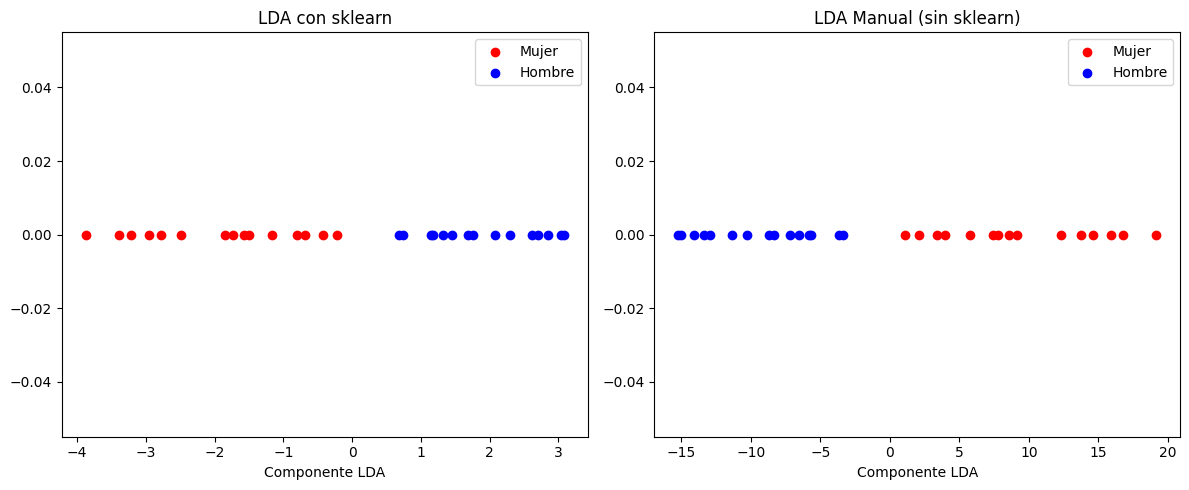

In [18]:
import matplotlib.pyplot as plt
# ==== Graficar ambos resultados ====
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("LDA con sklearn")
plt.scatter(X_lda_sklearn[y == 0], np.zeros_like(X_lda_sklearn[y == 0]), label="Mujer", c='red')
plt.scatter(X_lda_sklearn[y == 1], np.zeros_like(X_lda_sklearn[y == 1]), label="Hombre", c='blue')
plt.legend()
plt.xlabel("Componente LDA")

plt.subplot(1, 2, 2)
plt.title("LDA Manual (sin sklearn)")
plt.scatter(X_lda_manual[y == 0], np.zeros_like(X_lda_manual[y == 0]), label="Mujer", c='red')
plt.scatter(X_lda_manual[y == 1], np.zeros_like(X_lda_manual[y == 1]), label="Hombre", c='blue')
plt.legend()
plt.xlabel("Componente LDA")

plt.tight_layout()
plt.show()


In [19]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df["LDA_sklearn"], df["LDA_manual"])
print(f"Correlación entre LDA_sklearn y LDA_manual: {corr:.4f}")


Correlación entre LDA_sklearn y LDA_manual: -1.0000


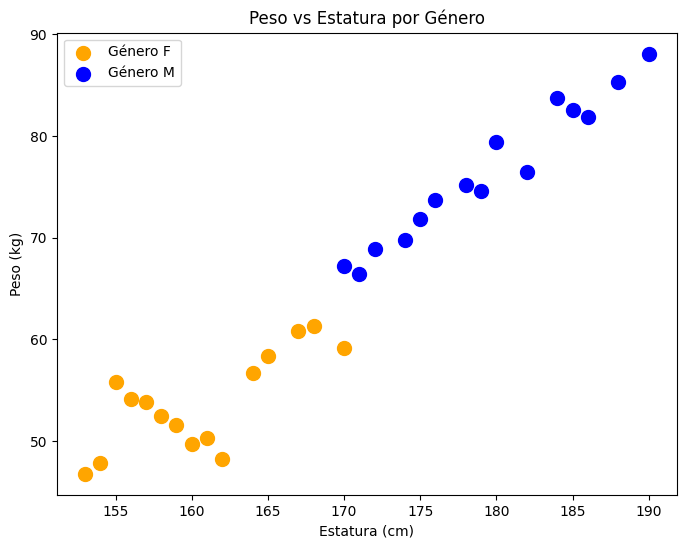

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos simulados
data = pd.DataFrame({
    "peso": [52.5, 48.2, 55.8, 61.3, 49.7, 58.4, 53.9, 46.8, 59.2, 51.6, 50.3, 56.7, 54.1, 47.9, 60.8,
             75.2, 82.6, 68.9, 79.4, 71.8, 85.3, 73.7, 67.2, 88.1, 76.5, 69.8, 81.9, 74.6, 66.4, 83.7],
    "estatura": [158, 162, 155, 168, 160, 165, 157, 153, 170, 159, 161, 164, 156, 154, 167,
                 178, 185, 172, 180, 175, 188, 176, 170, 190, 182, 174, 186, 179, 171, 184],
    "genero": ["F"] * 15 + ["M"] * 15
})
# Colores por clase
colors = {'F': 'orange', 'M': 'blue'}

plt.figure(figsize=(8, 6))
for genero in data['genero'].unique():
    subset = data[data['genero'] == genero]
    plt.scatter(subset['estatura'], subset['peso'], label=f"Género {genero}", color=colors[genero], s=100)

plt.title('Peso vs Estatura por Género')
plt.xlabel('Estatura (cm)')
plt.ylabel('Peso (kg)')
plt.legend()
plt.show()


In [21]:
df.to_csv("ldaa.csv")

In [22]:
df

,Peso,Estatura,Genero,LDA_sklearn,LDA_manual
0,52.5,158,Mujer,2.078514,-10.284637
1,48.2,162,Mujer,3.075774,-15.219143
2,55.8,155,Mujer,1.315647,-6.509918
3,61.3,168,Mujer,0.681784,-3.373517
4,49.7,160,Mujer,2.706475,-13.391829
5,58.4,165,Mujer,1.152536,-5.702828
6,53.9,157,Mujer,1.764534,-8.731041
7,46.8,153,Mujer,3.035541,-15.020074
8,59.2,170,Mujer,1.170466,-5.791544
9,51.6,159,Mujer,2.293009,-11.345972
